In [1]:
import load_cdf as cdf
import numpy as np
import math
from calendar import monthrange
from collections import namedtuple
import pickle
import scipy.io 
import scipy.signal

import cdflib 
import matplotlib.dates as md
import matplotlib
from matplotlib import pyplot as plt
import datetime as dt
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [2]:
Date = namedtuple("Date", ["year", "month", "day"])
def all_dates_in_year(year):
    Fp = np.array([])
    WA_AMP_MED = np.array([])
    WA_NR_EVENTS = np.array([])
    time = np.array([])
    Epoch = np.array([])
    for month in range(1, 13): # Month is always 1..12
        for day in range(1, monthrange(year, month)[1] + 1):
            Fp1, WA_AMP_MED1, WA_NR_EVENTS1, time1, Epoch1 = check_date(year, month, day)
            if not isinstance(Fp1, int):
                Fp = np.append(Fp, Fp1)
                WA_AMP_MED = np.append(WA_AMP_MED, WA_AMP_MED1)
                WA_NR_EVENTS = np.append(WA_NR_EVENTS, WA_NR_EVENTS1)
                time = np.append(time, time1)
                Epoch = np.append(Epoch, Epoch1)
    return [Fp, WA_AMP_MED, WA_NR_EVENTS, time, Epoch]

In [4]:
def check_date(year, month, day):
    data = cdf.load_rpw('stat', year, month, day, 'L1')
    if data != -1:
        print('Checking %04d%02d%02d_V' % (year, month, day))
        return SBM_degraded(data)
    else:
        return [-1,-1,-1,-1,-1]

In [5]:
def SBM_degraded(data):
    time = cdflib.cdfepoch.breakdown_tt2000(data['Epoch'])
    Epoch = data['Epoch']
    #time =[dt.datetime.fromtimestamp(ts) for ts in time]
    Fp = 1024 * 2 ** (data['WA_MED_FREQ'] / 32)
    WA_AMP_MED = data['WA_AMP_MED']
    WA_NR_EVENTS = data['WA_NR_EVENTS']
    
    # CONSTANTS 
    #EPEAK_THRES_F = 750
    #FP_MIN = 5000   #Hz
    #FP_MAX = 60000  #Hz
    #RUA = 0.5       #AU  ??
    #NW_THRES_F = 3
    
    return [Fp, WA_AMP_MED, WA_NR_EVENTS, time, Epoch]

In [5]:
# CONSTANTS 
EPEAK_THRES_F = 750
FP_MIN = 5000   #Hz
FP_MAX = 60000  #Hz
NW_THRES_F = 20
rua = scipy.io.loadmat('rua.mat')
rua = rua['rua']
rua = np.transpose(rua).shape
rua = scipy.signal.resample(rua, 2330067)

In [7]:
[Fp, WA_AMP_MED, WA_NR_EVENTS, time, Epoch] = all_dates_in_year(2020)


Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Checking 20200225_V
Checking 20200226_V
Checking 20200227_V
Checking 20200228_V
Checking 20200229_V
Checking 20200301_V
Checking 20200302_V
Checking 20200303_V
Checking 20200304_V
Checking 20200305_V
Checking 20200306_V
Checking 2

In [10]:
[Fp21, WA_AMP_MED21, WA_NR_EVENTS21, time21, Epoch21] = all_dates_in_year(2021)

Checking 20210101_V
Checking 20210102_V
Checking 20210103_V
Checking 20210104_V
Checking 20210105_V
Checking 20210106_V
Checking 20210107_V
Checking 20210108_V
Checking 20210109_V
Checking 20210110_V
Checking 20210111_V
Checking 20210112_V
Checking 20210113_V
Checking 20210114_V
Checking 20210115_V
Checking 20210116_V
Checking 20210117_V
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Dir not found
Checking 20210124_V
Checking 20210125_V
Checking 20210126_V
Checking 20210127_V
Checking 20210128_V
Checking 20210129_V
Checking 20210130_V
Checking 20210131_V
Checking 20210201_V
Checking 20210202_V
Checking 20210203_V
Checking 20210204_V
Checking 20210205_V
Checking 20210206_V
Checking 20210207_V
Checking 20210208_V
Checking 20210209_V
Checking 20210210_V
Checking 20210211_V
Checking 20210212_V
Checking 20210213_V
Checking 20210214_V
Checking 20210215_V
Checking 20210216_V
Checking 20210217_V
Checking 20210218_V
Checking 20210219_V
Checking 20210220_V
Checking 2021022

In [11]:
Fp = np.append(Fp, Fp21)
WA_AMP_MED = np.append(WA_AMP_MED, WA_AMP_MED21)
WA_NR_EVENTS = np.append(WA_NR_EVENTS, WA_NR_EVENTS21)
time = np.append(time, time21)
Epoch = np.append(Epoch, Epoch21)

In [13]:
Epoch.shape

(2373729,)

In [14]:
# loading data

with open('backup_SBM2_data_V2.pickle', 'rb') as f:
    Fp, WA_AMP_MED, WA_NR_EVENTS, time = pickle.load(f)
    
rua = scipy.io.loadmat('rua.mat')
rua = rua['rua']
rua = np.transpose(rua)
rua = scipy.signal.resample(rua, 2373729)

In [15]:
with open('backup_SBM2_data_V4.pickle', 'wb') as f:
    pickle.dump([Fp, WA_AMP_MED, WA_NR_EVENTS, time, Epoch, rua], f)

In [18]:
with open('SBM2_raw_data_V5.pickle', 'wb') as f:
    pickle.dump([Fp, WA_AMP_MED, WA_NR_EVENTS, Epoch], f)
with open('SBM2_timepos_data_V5.pickle', 'wb') as f:
    pickle.dump([time, rua], f)

In [23]:
# loading data

with open('backup_SBM2_data_V2.pickle', 'rb') as f:
    Fp, WA_AMP_MED, WA_NR_EVENTS, time = pickle.load(f)
    
rua = scipy.io.loadmat('rua.mat')
rua = rua['rua']
rua = np.transpose(rua)
rua = scipy.signal.resample(rua, 2330067)time.shape


(2330067,)

In [43]:
data = cdf.load_rpw('stat', 2021,5,23,'L1')
time = cdflib.cdfepoch.breakdown_tt2000(data['Epoch'])
for i in range(len(time)):
    time[i] = dt.datetime(time[i][0], time[i][1],time[i][2],time[i][3],time[i][4],time[i][5],time[i][6])

In [42]:
time

[datetime.datetime(2021, 5, 23, 0, 1, 7, 39),
 datetime.datetime(2021, 5, 23, 0, 1, 23, 39),
 datetime.datetime(2021, 5, 23, 0, 1, 39, 39),
 datetime.datetime(2021, 5, 23, 0, 1, 55, 39),
 datetime.datetime(2021, 5, 23, 0, 2, 11, 39),
 datetime.datetime(2021, 5, 23, 0, 2, 27, 39),
 datetime.datetime(2021, 5, 23, 0, 2, 43, 39),
 datetime.datetime(2021, 5, 23, 0, 2, 59, 39),
 datetime.datetime(2021, 5, 23, 0, 3, 15, 39),
 datetime.datetime(2021, 5, 23, 0, 3, 31, 39),
 datetime.datetime(2021, 5, 23, 0, 3, 47, 39),
 datetime.datetime(2021, 5, 23, 0, 4, 3, 39),
 datetime.datetime(2021, 5, 23, 0, 4, 19, 39),
 datetime.datetime(2021, 5, 23, 0, 4, 35, 39),
 datetime.datetime(2021, 5, 23, 0, 4, 51, 39),
 datetime.datetime(2021, 5, 23, 0, 5, 7, 39),
 datetime.datetime(2021, 5, 23, 0, 5, 23, 39),
 datetime.datetime(2021, 5, 23, 0, 5, 39, 39),
 datetime.datetime(2021, 5, 23, 0, 5, 55, 39),
 datetime.datetime(2021, 5, 23, 0, 6, 11, 39),
 datetime.datetime(2021, 5, 23, 0, 6, 27, 39),
 datetime.dateti

In [45]:
Fp = 1024 * 2 ** (data['WA_MED_FREQ'] / 32)
EPEAK_THRES_F = 300
FP_MIN = 5000   #Hz
FP_MAX = 60000  #Hz
RUA = 0.7       #AU gotta check this
NW_THRES_F = 3
WA_AMP_MED = data['WA_AMP_MED']
WA_NR_EVENTS = data['WA_NR_EVENTS']

<function matplotlib.pyplot.show(close=None, block=None)>

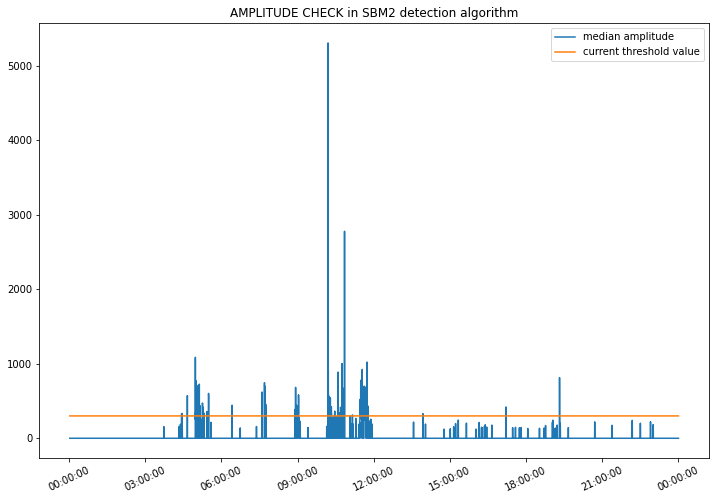

In [46]:
# AMPLITUDE CHECK
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(time, WA_AMP_MED)
plt.plot(time, np.zeros(WA_AMP_MED.size)+EPEAK_THRES_F)
#plt.plot(time, np.zeros(WA_AMP_MED.size)+450)

plt.title('AMPLITUDE CHECK in SBM2 detection algorithm')
plt.legend(['median amplitude','current threshold value'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

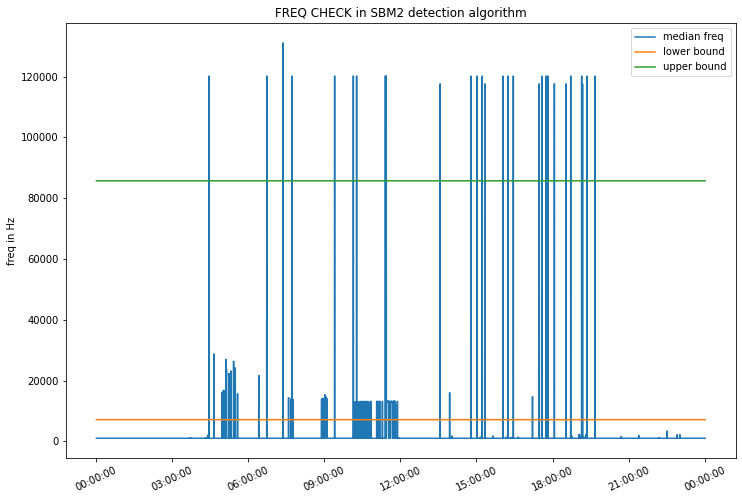

In [47]:
# FREQUENCY CHECK
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(time, Fp)
plt.plot(time, np.zeros(WA_AMP_MED.size)+(FP_MIN / RUA))
plt.plot(time, np.zeros(WA_AMP_MED.size)+(FP_MAX / RUA))

plt.title('FREQ CHECK in SBM2 detection algorithm')
plt.ylabel('freq in Hz')
plt.legend(['median freq','lower bound','upper bound'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

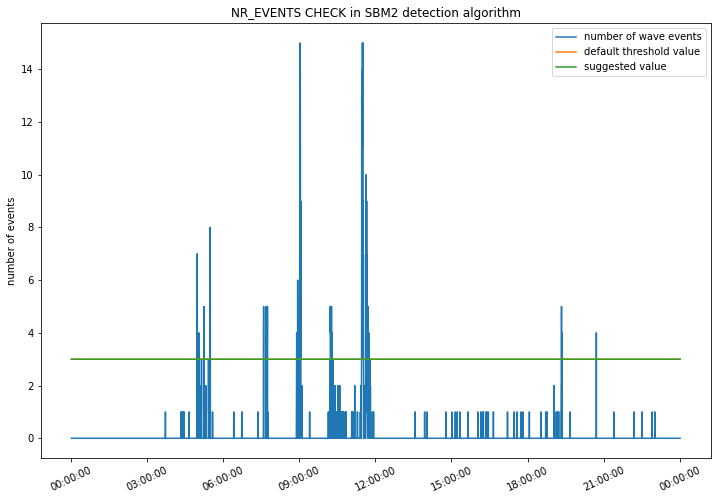

In [48]:
# NR_EVENTS CHECK
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(time, WA_NR_EVENTS)
plt.plot(time, np.zeros(WA_NR_EVENTS.size)+(NW_THRES_F))
plt.plot(time, np.zeros(WA_NR_EVENTS.size)+(3))

plt.title('NR_EVENTS CHECK in SBM2 detection algorithm')
plt.ylabel('number of events')
plt.legend(['number of wave events','default threshold value','suggested value'])
plt.show

45.0


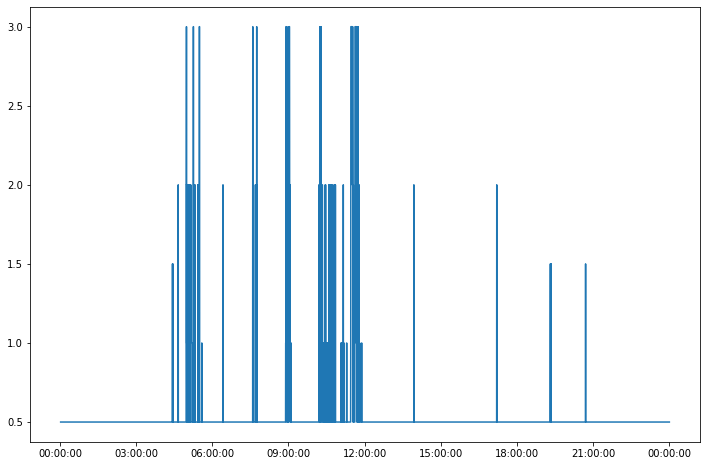

In [49]:
a = np.zeros(WA_NR_EVENTS.size)
a[WA_NR_EVENTS>NW_THRES_F] = a[WA_NR_EVENTS>NW_THRES_F] + 1
a[(FP_MIN / RUA) < Fp] = a[(FP_MIN / RUA) < Fp] + 0.5
a[Fp < (FP_MAX / RUA)] = a[Fp < (FP_MAX / RUA)] + 0.5
a[WA_AMP_MED > EPEAK_THRES_F] = a[WA_AMP_MED > EPEAK_THRES_F] + 1


ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(time, a)
plt.show

print(np.sum(a[a==3])/3)

In [33]:
dataL2 = cdf.load_rpw('stat', 2021,5,23,'L2')
WA_AMP_MED = dataL2['WA_AMP_MED']

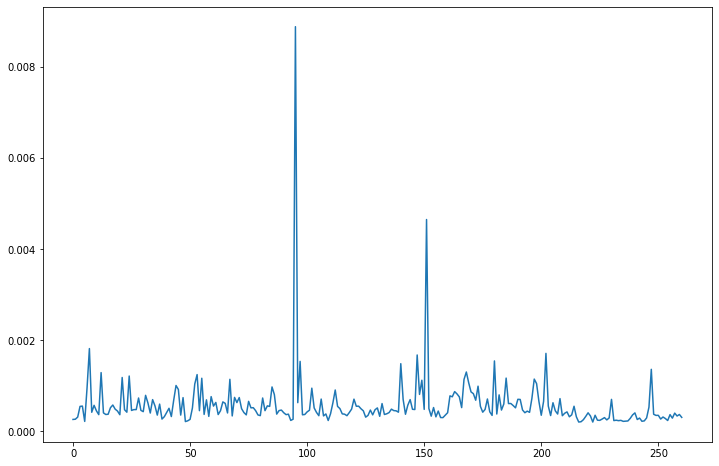

In [34]:
plt.plot(WA_AMP_MED[WA_AMP_MED>0])

In [ ]:
temp = np.where(a==3)
for i in temp[0]:
    print(time[i])

In [50]:
cdflib.cdfread.cdf_info()


AttributeError: module 'cdflib.cdfread' has no attribute 'cdf_info'

In [51]:
time

[datetime.datetime(2021, 5, 23, 2, 1, 7, 39172),
 datetime.datetime(2021, 5, 23, 2, 1, 23, 39198),
 datetime.datetime(2021, 5, 23, 2, 1, 39, 39225),
 datetime.datetime(2021, 5, 23, 2, 1, 55, 39251),
 datetime.datetime(2021, 5, 23, 2, 2, 11, 39278),
 datetime.datetime(2021, 5, 23, 2, 2, 27, 39304),
 datetime.datetime(2021, 5, 23, 2, 2, 43, 39331),
 datetime.datetime(2021, 5, 23, 2, 2, 59, 39357),
 datetime.datetime(2021, 5, 23, 2, 3, 15, 39384),
 datetime.datetime(2021, 5, 23, 2, 3, 31, 39410),
 datetime.datetime(2021, 5, 23, 2, 3, 47, 39437),
 datetime.datetime(2021, 5, 23, 2, 4, 3, 39463),
 datetime.datetime(2021, 5, 23, 2, 4, 19, 39490),
 datetime.datetime(2021, 5, 23, 2, 4, 35, 39516),
 datetime.datetime(2021, 5, 23, 2, 4, 51, 39543),
 datetime.datetime(2021, 5, 23, 2, 5, 7, 39569),
 datetime.datetime(2021, 5, 23, 2, 5, 23, 39596),
 datetime.datetime(2021, 5, 23, 2, 5, 39, 39622),
 datetime.datetime(2021, 5, 23, 2, 5, 55, 39649),
 datetime.datetime(2021, 5, 23, 2, 6, 11, 39675),
 da

In [ ]:
1200/60

<function matplotlib.pyplot.show(close=None, block=None)>

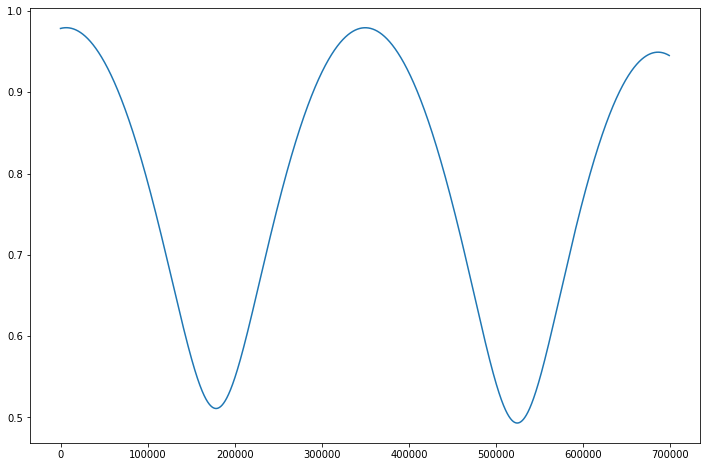

In [3]:
rua = scipy.io.loadmat('rua.mat')
rua = rua['rua']
rua = np.transpose(rua)
#rua = scipy.signal.resample(rua, 2330067)
plt.plot(rua)
plt.show

In [4]:
rua = scipy.signal.resample(rua, 2330067)

<function matplotlib.pyplot.show(close=None, block=None)>

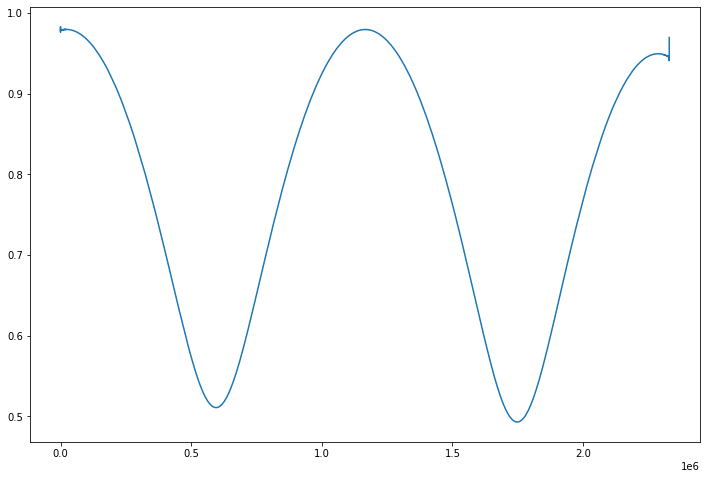

In [5]:
plt.plot(rua)
plt.show